# Assignment 6 - Group Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Use cv2 functions only or atleast wherever possible.***

> **This assignment marks 1/3rd of your project. And hence, it is the first part of the final submission from your team.**







## Create a DataLoader Class

Use the pytorch docs sent on group and deepen your understanding using sample practice, or even AI.

Finally, create a dataloader for the Fruits-360 dataset ( https://www.kaggle.com/datasets/moltean/fruits ).
In <code>__getitem__</code> , include the processing to create LBP image, canny image, and find the 6 color features and 6 shape features.
Best implementation should include a proper division of tasks between the method itself and utility functions.
Also brainstorm about the data structures you use to process and pass the info. Use cv2 functions for best performance.

In [44]:
import os

os.environ["KAGGLE_USERNAME"] = "Ashmil Saxena"
os.environ["KAGGLE_KEY"] = "KGAT_c94eace91e069cb0fe142dfb52d69bc6"


In [45]:
!pip install -q kaggle


In [46]:
!kaggle datasets list | head


ref                                                              title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                         Heart Disease                                          3491  2025-12-11 15:29:14.327000           2114        107  1.0              
alistairs/my-spotify-listening-history                           My Spotify Listening History                        3965374  2025-12-10 22:19:08.927000             78         28  1.0              
neurocipher/student-performance                                  Student Performance                                   49705  2025-12-12 12:06:28.973000           1261         80  1.0              
wardabilal

In [47]:
!kaggle datasets download -d moltean/fruits --unzip


Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
100% 4.89G/4.90G [01:25<00:00, 102MB/s]
100% 4.90G/4.90G [01:25<00:00, 61.3MB/s]


In [55]:
!ls /content


drive			   fruits-360_dataset_meta   sample_data
fruits-360_100x100	   fruits-360_multi
fruits-360_3-body-problem  fruits-360_original-size


In [56]:
!ls /content/fruits-360_100x100


fruits-360


In [59]:
!ls /content/fruits-360_100x100/fruits-360


LICENSE  README.md  Test  Training


In [60]:
DATA_ROOT = "/content/fruits-360_100x100/fruits-360/Training"


In [52]:
class FruitsDataset:
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.image_paths = []
        self.labels = []
        self.class_to_idx = {}

        self.build_index()

    def build_index(self):
        classes = sorted(os.listdir(self.root_dir))

        for idx, class_name in enumerate(classes):
            self.class_to_idx[class_name] = idx

        for class_name in classes:
            class_folder = os.path.join(self.root_dir, class_name)
            label = self.class_to_idx[class_name]

            for file in os.listdir(class_folder):
                if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                    self.image_paths.append(
                        os.path.join(class_folder, file)
                    )
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        return self.image_paths[idx], self.labels[idx]


In [61]:
dataset = FruitsDataset(DATA_ROOT)
print("Total images:", len(dataset))

Total images: 124716


In [62]:
print("Total images:", len(dataset))
print("Number of classes:", len(dataset.class_to_idx))
print("Class to index mapping (first 5):")

for k in list(dataset.class_to_idx.keys())[:5]:
    print(k, "→", dataset.class_to_idx[k])


Total images: 124716
Number of classes: 237
Class to index mapping (first 5):
Apple 10 → 0
Apple 11 → 1
Apple 12 → 2
Apple 13 → 3
Apple 14 → 4


In [63]:
for i in range(5):
    path, label = dataset[i]
    print(label, ":", path)


0 : /content/fruits-360_100x100/fruits-360/Training/Apple 10/r2_208_100.jpg
0 : /content/fruits-360_100x100/fruits-360/Training/Apple 10/r1_73_100.jpg
0 : /content/fruits-360_100x100/fruits-360/Training/Apple 10/r2_276_100.jpg
0 : /content/fruits-360_100x100/fruits-360/Training/Apple 10/r0_285_100.jpg
0 : /content/fruits-360_100x100/fruits-360/Training/Apple 10/r0_22_100.jpg


In [64]:
"""
image processing
"""

'\nimage processing\n'

In [65]:
import cv2
import numpy as np


In [66]:
def read_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Could not read image {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def resize_image(img, size=(100, 100)):
    return cv2.resize(img, size)


def to_gray(img_rgb):
    return cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)


def compute_canny(gray, low=100, high=200):
    return cv2.Canny(gray, low, high)


In [67]:
def compute_lbp(gray):
    h, w = gray.shape
    lbp = np.zeros((h, w), dtype=np.uint8)

    for i in range(1, h-1):
        for j in range(1, w-1):
            center = gray[i, j]
            binary = [
                gray[i-1,j-1] >= center,
                gray[i-1,j]   >= center,
                gray[i-1,j+1] >= center,
                gray[i,j+1]   >= center,
                gray[i+1,j+1] >= center,
                gray[i+1,j]   >= center,
                gray[i+1,j-1] >= center,
                gray[i,j-1]   >= center
            ]

            value = 0
            for idx, bit in enumerate(binary):
                value += bit << idx

            lbp[i, j] = value

    return lbp


In [68]:
path, _ = dataset[0]

img = read_image(path)
img = resize_image(img)
gray = to_gray(img)

canny = compute_canny(gray)
lbp = compute_lbp(gray)

print(img.shape, gray.shape, canny.shape, lbp.shape)


(100, 100, 3) (100, 100) (100, 100) (100, 100)


In [38]:
"""
Color Feature Extraction
"""

'\nColor Feature Extraction\n'

In [69]:
def extract_color_features(img_rgb):
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    h, s, v = cv2.split(hsv)

    features = np.array([
        np.mean(h), np.mean(s), np.mean(v),
        np.std(h),  np.std(s),  np.std(v)
    ], dtype=np.float32)

    return features


In [70]:
color_feats = extract_color_features(img)
print(color_feats, color_feats.shape)


[  8.2635   117.4561   168.6543    16.065668  91.42295   66.745766] (6,)


In [39]:
"""
Shape feature extraction
"""

'\nShape feature extraction\n'

In [71]:
def extract_shape_features(gray):
    _, binary = cv2.threshold(
        gray, 0, 255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    contours, _ = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    if len(contours) == 0:
        return np.zeros(6, dtype=np.float32)

    cnt = max(contours, key=cv2.contourArea)

    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    h_img, w_img = gray.shape
    image_area = h_img * w_img
    area_ratio = area / image_area

    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / h if h != 0 else 0

    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = area / hull_area if hull_area != 0 else 0

    extent = area / (w * h) if w*h != 0 else 0
    circularity = (4 * np.pi * area) / (perimeter**2) if perimeter != 0 else 0

    return np.array([
        area_ratio,
        perimeter,
        aspect_ratio,
        solidity,
        extent,
        circularity
    ], dtype=np.float32)


In [72]:
shape_feats = extract_shape_features(gray)
print(shape_feats, shape_feats.shape)


[1.9470000e-01 3.6230865e+02 4.4999999e-01 4.7967479e-01 4.3266666e-01
 1.8638819e-01] (6,)


In [74]:
"""
FINAL Dataset and DataLoader
"""

'\nFINAL Dataset and DataLoader\n'

In [73]:
import torch
from torch.utils.data import Dataset, DataLoader


In [75]:
class FruitsDatasetFull(Dataset):
    def __init__(self, root_dir, image_size=(100,100)):
        self.root_dir = root_dir
        self.image_size = image_size

        self.image_paths = []
        self.labels = []
        self.class_to_idx = {}

        classes = sorted(os.listdir(root_dir))
        for idx, c in enumerate(classes):
            self.class_to_idx[c] = idx

        for c in classes:
            folder = os.path.join(root_dir, c)
            label = self.class_to_idx[c]

            for f in os.listdir(folder):
                if f.lower().endswith(('.jpg','.png','.jpeg')):
                    self.image_paths.append(os.path.join(folder,f))
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        path = self.image_paths[idx]
        label = self.labels[idx]

        img = read_image(path)
        img = resize_image(img, self.image_size)
        gray = to_gray(img)

        canny = compute_canny(gray)
        lbp = compute_lbp(gray)

        color_feats = extract_color_features(img)
        shape_feats = extract_shape_features(gray)

        features = np.concatenate([color_feats, shape_feats])

        return {
            "image": img,
            "lbp": lbp,
            "canny": canny,
            "features": features,
            "label": label
        }


In [76]:
full_dataset = FruitsDatasetFull(DATA_ROOT)
print(len(full_dataset))


124716


In [77]:
loader = DataLoader(
    full_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=2
)


In [78]:
batch = next(iter(loader))

print(batch["features"].shape)
print(batch["label"].shape)


torch.Size([8, 12])
torch.Size([8])


In [83]:
"""
Testing
"""

'\nTesting\n'

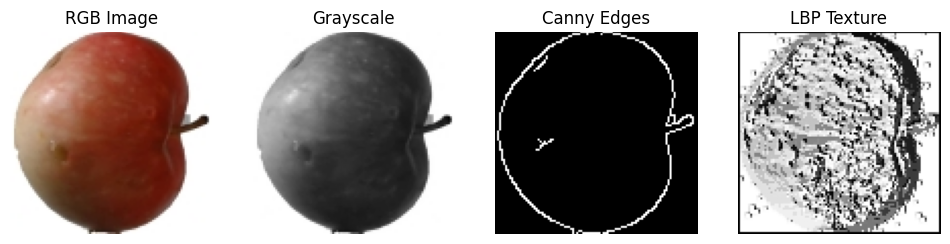

In [79]:
import matplotlib.pyplot as plt

path, label = dataset[0]

img = read_image(path)
gray = to_gray(img)
edges = compute_canny(gray)
lbp = compute_lbp(gray)

plt.figure(figsize=(12,3))

plt.subplot(1,4,1)
plt.imshow(img)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(lbp, cmap="gray")
plt.title("LBP Texture")
plt.axis("off")

plt.show()


In [80]:
color_feats = extract_color_features(img)
shape_feats = extract_shape_features(gray)

features = np.concatenate([color_feats, shape_feats])

print("Color features:", color_feats)
print("Shape features:", shape_feats)
print("Combined feature vector shape:", features.shape)


Color features: [  8.2635   117.4561   168.6543    16.065668  91.42295   66.745766]
Shape features: [1.9470000e-01 3.6230865e+02 4.4999999e-01 4.7967479e-01 4.3266666e-01
 1.8638819e-01]
Combined feature vector shape: (12,)


In [81]:
sample = full_dataset[0]

print("Keys:", sample.keys())
print("Image shape:", sample["image"].shape)
print("LBP shape:", sample["lbp"].shape)
print("Canny shape:", sample["canny"].shape)
print("Features shape:", sample["features"].shape)
print("Label:", sample["label"])


Keys: dict_keys(['image', 'lbp', 'canny', 'features', 'label'])
Image shape: (100, 100, 3)
LBP shape: (100, 100)
Canny shape: (100, 100)
Features shape: (12,)
Label: 0


In [82]:
X = []
y = []

for i in range(100):
    sample = full_dataset[i]
    X.append(sample["features"])
    y.append(sample["label"])

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)


(100, 12) (100,)
